In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4052,) <U51
features <type 'numpy.ndarray'> (4052, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 1.21


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=512, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [9]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0001, print_every=2000, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-43',
                                 print_bleu=False, log_path='./log/')

INFO:tensorflow:Restoring parameters from ./model/lstm/model-43
Sampled Caption: a yellow bus is driving down a road .


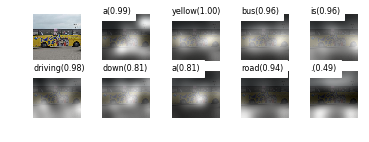

Sampled Caption: a man and woman are riding a horse on the street .


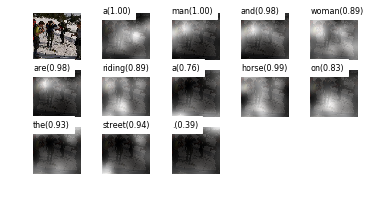

Sampled Caption: a man riding a skateboard on a park .


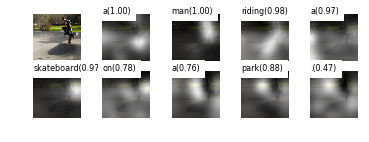

Sampled Caption: a living room with a couch and a television in it .


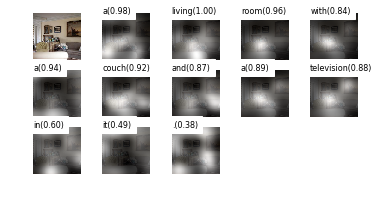

Sampled Caption: a group of people standing on a tennis court .


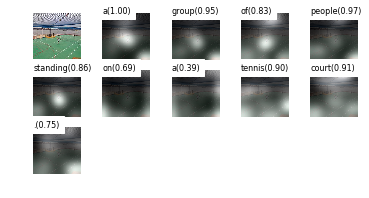

Sampled Caption: a man is standing on a lush green field .


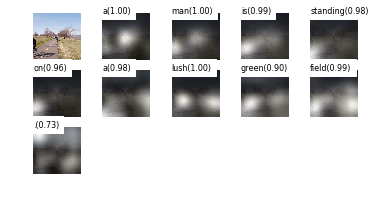

Sampled Caption: a zebra is standing in a field with trees in the background .


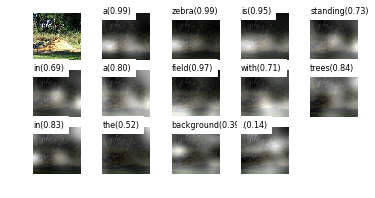

Sampled Caption: a keyboard and keyboard on a keyboard in a box .


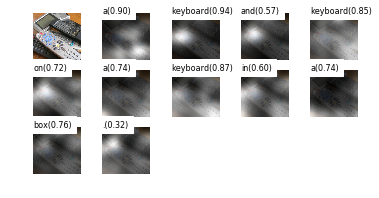

Sampled Caption: a man is riding a bike down a road .


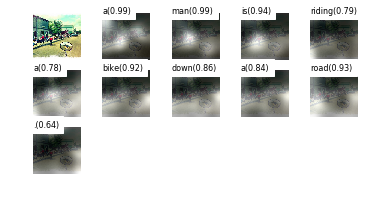

Sampled Caption: a large airplane is parked on a runway at the airport .


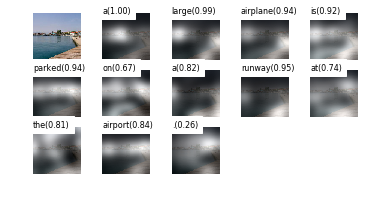

Saved ./data/val/val.candidate.captions.pkl..


In [10]:
solver.test(data, split='val')

In [11]:
test = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4048,) <U51
features <type 'numpy.ndarray'> (4048, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 1.16


INFO:tensorflow:Restoring parameters from ./model/lstm/model-43
Sampled Caption: a living room with a couch a television and a window .


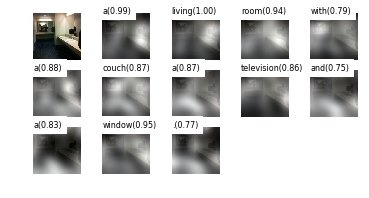

Sampled Caption: a man holding a wii controller in a living room .


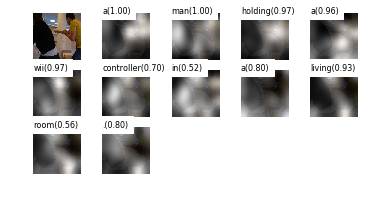

Sampled Caption: a man is sitting on a bench holding a skateboard .


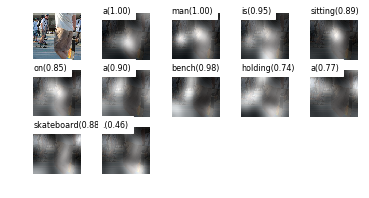

Sampled Caption: a man holding a cell phone in a room .


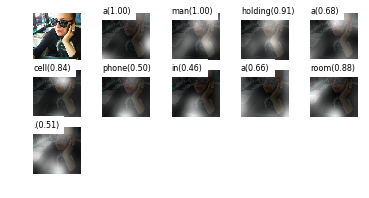

Sampled Caption: a blue and blue bus parked on a street .


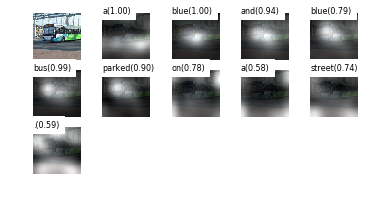

Sampled Caption: a man on skis going down a snowy hill .


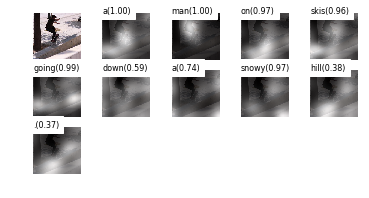

Sampled Caption: a man holding a laptop on top of a table .


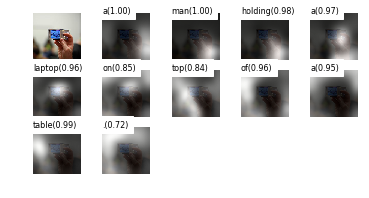

Sampled Caption: a man standing on top of a dry grass field .


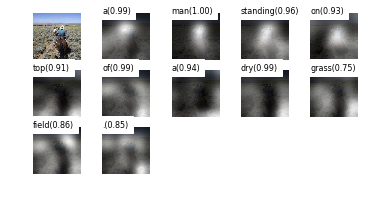

Sampled Caption: a red and yellow train on a track near a mountain .


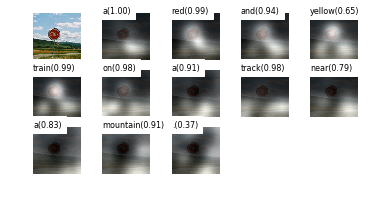

Sampled Caption: a man standing on a beach holding a kite .


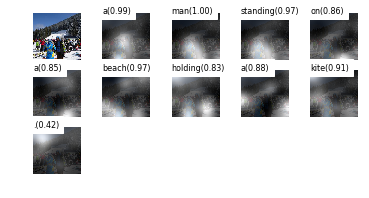

Saved ./data/test/test.candidate.captions.pkl..


In [12]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [13]:
evaluate(data_path='./data', split='val')

{'reflen': 44121, 'guess': [44990, 40938, 36886, 32834], 'testlen': 44990, 'correct': [28276, 11052, 4257, 1748]}
ratio: 1.01969583645
Bleu_1:	0.62849522116
Bleu_2:	0.411915483722
Bleu_3:	0.269537652044
Bleu_4:	0.179687964599
METEOR:	0.202221724384
ROUGE_L: 0.4952308550343013
CIDEr:	0.571189984315772


In [9]:
evaluate(data_path='./data', split='test')

{'reflen': 42968, 'guess': [43422, 39374, 35326, 31278], 'testlen': 43422, 'correct': [27869, 11167, 4521, 1912]}
ratio: 1.01056600261
Bleu_1:	0.64181751186
Bleu_2:	0.426647564545
Bleu_3:	0.285600871315
Bleu_4:	0.194259324489
METEOR:	0.203228282671
ROUGE_L: 0.5013087555620854
CIDEr:	0.5804948083530485
